# GSE Accession Analysis for mouse: Wordcloud for GSM Characteristics
This notebook took the first 10 GSE accession numbers of mouse to retreive their respective GSM and looked at the wordcloud for characterstics.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
import re
import json

In [2]:
from tqdm import trange


In [3]:
GREIN_data = pd.read_csv("data/GREIN_data.csv")

In [4]:
GREIN_data.head()

,GEO accession,Species
0,GSE100021,Rattus norvegicus
1,GSE100027,Homo sapiens
2,GSE100035,Mus musculus
3,GSE100039,Mus musculus
4,GSE100040,Homo sapiens


In [5]:
def import_GSE():
    GREIN_data = pd.read_csv("data/GREIN_data.csv")
    GREIN_data = GREIN_data[GREIN_data.Species != 'Rattus norvegicus'] #drop brown rat
    GREIN_human = GREIN_data[GREIN_data.Species == 'Homo sapiens']
    GREIN_mouse = GREIN_data[GREIN_data.Species == 'Mus musculus']
    
    GSE_human = GREIN_human['GEO accession'].tolist()
    GSE_mouse = GREIN_mouse['GEO accession'].tolist()
    
    return GSE_human, GSE_mouse

In [6]:
print(len(import_GSE()))

2


In [7]:
def scrape_geo_data(geo_id):
    url = f"https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc={geo_id}"

    try:
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            # Find all <a> tags with href attributes containing "GSM"
            gsm_links = soup.find_all('a', href=lambda href: href and href.startswith('/geo/query/acc.cgi?acc=GSM'))

            # Extract and store only the GSM values
            gsm_values = [link.text for link in gsm_links]

            return gsm_values

        else:
            return f"Failed to retrieve the page. Status code: {response.status_code}"

    except requests.exceptions.RequestException as e:
        return f"Error: {e}"

In [8]:
GSMs_mouse = scrape_geo_data("GSE100027")
print(GSMs_mouse)

GSEs_mouse = import_GSE()[1]
GSEs_mouse_10 = GSEs_mouse[:10]
print(GSEs_mouse_10)

['GSM2668081', 'GSM2668082', 'GSM2668083', 'GSM2668084', 'GSM2668085', 'GSM2668086', 'GSM2668087', 'GSM2668088', 'GSM2668089']
['GSE100035', 'GSE100039', 'GSE100067', 'GSE100070', 'GSE100098', 'GSE100102', 'GSE100106', 'GSE100175', 'GSE100212', 'GSE100217']


In [9]:
GSM_mouse = []
for GSE in GSEs_mouse_10:
    GSMs_mouse = scrape_geo_data(GSE)
    GSM_mouse.append(GSMs_mouse)
    # data[GSE] = GSMs


In [10]:
if GSMs_mouse:
    GSM_mouse = [item for sublist in GSM_mouse for item in sublist] #flatten the list
    print(GSM_mouse)

['GSM2668159', 'GSM2668160', 'GSM2668161', 'GSM2668162', 'GSM2668163', 'GSM2668164', 'GSM2668165', 'GSM2668166', 'GSM2668167', 'GSM2668168', 'GSM2668169', 'GSM2668170', 'GSM2668171', 'GSM2668172', 'GSM2668173', 'GSM2668174', 'GSM2668175', 'GSM2668176', 'GSM2668177', 'GSM2668178', 'GSM2668179', 'GSM2668180', 'GSM2668181', 'GSM2668182', 'GSM2668183', 'GSM2668184', 'GSM2668185', 'GSM2668186', 'GSM2668518', 'GSM2668519', 'GSM2668520', 'GSM2668521', 'GSM2668522', 'GSM2668523', 'GSM2668524', 'GSM2668525', 'GSM2668526', 'GSM2668527', 'GSM2668528', 'GSM2668529', 'GSM2668530', 'GSM2668531', 'GSM2668532', 'GSM2668533', 'GSM2668534', 'GSM2668535', 'GSM2668536', 'GSM2668537', 'GSM2668538', 'GSM2668539', 'GSM2668540', 'GSM2668541', 'GSM2668542', 'GSM2668543', 'GSM2668544', 'GSM2668545', 'GSM2668546', 'GSM2668547', 'GSM2668548', 'GSM2668549', 'GSM2668550', 'GSM2668551', 'GSM2668552', 'GSM2668553', 'GSM2670763', 'GSM2670764', 'GSM2670765', 'GSM2670766', 'GSM2670767', 'GSM2670768', 'GSM2670769', 'GSM2

In [11]:
print(GSM_mouse)

['GSM2668159', 'GSM2668160', 'GSM2668161', 'GSM2668162', 'GSM2668163', 'GSM2668164', 'GSM2668165', 'GSM2668166', 'GSM2668167', 'GSM2668168', 'GSM2668169', 'GSM2668170', 'GSM2668171', 'GSM2668172', 'GSM2668173', 'GSM2668174', 'GSM2668175', 'GSM2668176', 'GSM2668177', 'GSM2668178', 'GSM2668179', 'GSM2668180', 'GSM2668181', 'GSM2668182', 'GSM2668183', 'GSM2668184', 'GSM2668185', 'GSM2668186', 'GSM2668518', 'GSM2668519', 'GSM2668520', 'GSM2668521', 'GSM2668522', 'GSM2668523', 'GSM2668524', 'GSM2668525', 'GSM2668526', 'GSM2668527', 'GSM2668528', 'GSM2668529', 'GSM2668530', 'GSM2668531', 'GSM2668532', 'GSM2668533', 'GSM2668534', 'GSM2668535', 'GSM2668536', 'GSM2668537', 'GSM2668538', 'GSM2668539', 'GSM2668540', 'GSM2668541', 'GSM2668542', 'GSM2668543', 'GSM2668544', 'GSM2668545', 'GSM2668546', 'GSM2668547', 'GSM2668548', 'GSM2668549', 'GSM2668550', 'GSM2668551', 'GSM2668552', 'GSM2668553', 'GSM2670763', 'GSM2670764', 'GSM2670765', 'GSM2670766', 'GSM2670767', 'GSM2670768', 'GSM2670769', 'GSM2

In [12]:
def save_results_to_file(results, filename):
    with open(filename, 'w', encoding='utf-8') as file:
        for result in results:
            file.write(result + '\n')

In [13]:
csv_file_path = "data/GSM_mouse.csv"

# with open(csv_file_path, mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(GSM)

In [14]:
def scrape_characteristics(geo_id):
    url = f"https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc={geo_id}"

    try:
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            
            characteristics_dict = {}
            
            # Find the "Characteristics" label
            characteristics_label = soup.find('td', text='Characteristics')
            
            if characteristics_label:
                # Get the next sibling (which contains the characteristics content)
                characteristics_content = characteristics_label.find_next_sibling('td')
                characteristics_string = str(characteristics_content)

            return characteristics_string

        else:
            return f"Failed to retrieve the page. Status code: {response.status_code}"

    except requests.exceptions.RequestException as e:
        return f"Error: {e}"

In [15]:
def extract_characteristics(input_str):
    
    input_str = re.sub(r'<td[^>]*>', '', input_str) # remove <td> tags
    
    pattern = r'(\w+): ([^<]+)'
    matches = re.findall(pattern, input_str)

    characteristics_dictionary = dict(matches)
    
    return characteristics_dictionary

In [16]:
geo_id = "GSM2683998"
characteristics_string = scrape_characteristics(geo_id)
characteristics_dictionary = extract_characteristics(characteristics_string )
print("characteristics_dictionary:", characteristics_dictionary)

characteristics_dictionary: {'strain': 'C57BL/6J', 'age': '3 months', 'genotype': 'wild type'}


/tmp/ipykernel_766627/2193903069.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  characteristics_label = soup.find('td', text='Characteristics')


In [17]:
results = {}

In [18]:
print(GSM_mouse)

['GSM2668159', 'GSM2668160', 'GSM2668161', 'GSM2668162', 'GSM2668163', 'GSM2668164', 'GSM2668165', 'GSM2668166', 'GSM2668167', 'GSM2668168', 'GSM2668169', 'GSM2668170', 'GSM2668171', 'GSM2668172', 'GSM2668173', 'GSM2668174', 'GSM2668175', 'GSM2668176', 'GSM2668177', 'GSM2668178', 'GSM2668179', 'GSM2668180', 'GSM2668181', 'GSM2668182', 'GSM2668183', 'GSM2668184', 'GSM2668185', 'GSM2668186', 'GSM2668518', 'GSM2668519', 'GSM2668520', 'GSM2668521', 'GSM2668522', 'GSM2668523', 'GSM2668524', 'GSM2668525', 'GSM2668526', 'GSM2668527', 'GSM2668528', 'GSM2668529', 'GSM2668530', 'GSM2668531', 'GSM2668532', 'GSM2668533', 'GSM2668534', 'GSM2668535', 'GSM2668536', 'GSM2668537', 'GSM2668538', 'GSM2668539', 'GSM2668540', 'GSM2668541', 'GSM2668542', 'GSM2668543', 'GSM2668544', 'GSM2668545', 'GSM2668546', 'GSM2668547', 'GSM2668548', 'GSM2668549', 'GSM2668550', 'GSM2668551', 'GSM2668552', 'GSM2668553', 'GSM2670763', 'GSM2670764', 'GSM2670765', 'GSM2670766', 'GSM2670767', 'GSM2670768', 'GSM2670769', 'GSM2

In [19]:
for GSM in GSM_mouse:
    characteristics_string = scrape_characteristics(GSM)
    characteristics_dictionary = extract_characteristics(characteristics_string)
    results[GSM] = characteristics_dictionary
    #print(f"Characteristics for {GSM}: {characteristics_dictionary}")

/tmp/ipykernel_766627/2193903069.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  characteristics_label = soup.find('td', text='Characteristics')


In [20]:
json_file = "data/test_characteristics_mouse.json"

with open(json_file, "w") as file:
    json.dump(results, file)

print(f"Characteristics saved to {json_file}")

Characteristics saved to data/test_characteristics_mouse.json


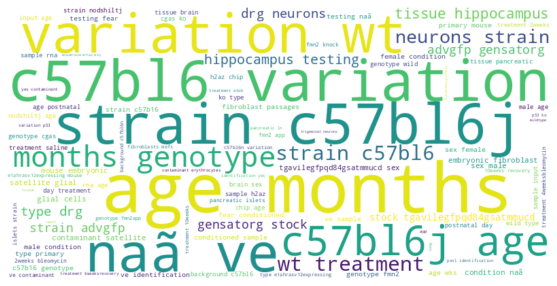

In [21]:
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

with open('data/test_characteristics_mouse.json', 'r') as json_file:
    data = json.load(json_file)

attribute_texts = []

for key, value in data.items():
    # Include the attribute key and its value
    attribute_text = f"{key}: {str(value)}"
    attribute_texts.append(attribute_text)

text_data = " ".join(attribute_texts)

text_data = text_data.lower()

text_data = remove_punctuation(text_data)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()


In [22]:
def scrape_characteristics(geo_id):
    url = f"https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc={geo_id}"

    try:
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            
            characteristics_dict = {}
            
            # Find the "Characteristics" label
            characteristics_label = soup.find('td', text='Characteristics')
            
            if characteristics_label:
                # Get the next sibling (which contains the characteristics content)
                characteristics_content = characteristics_label.find_next_sibling('td')
                characteristics_string = str(characteristics_content)

            return characteristics_string

        else:
            return f"Failed to retrieve the page. Status code: {response.status_code}"

    except requests.exceptions.RequestException as e:
        return f"Error: {e}"

In [23]:
def extract_characteristics(input_str):
    
    input_str = re.sub(r'<td[^>]*>', '', input_str) # remove <td> tags
    
    pattern = r'(\w+): ([^<]+)'
    matches = re.findall(pattern, input_str)
    
    characteristics_dictionary = {}
    
    for attribute, value in matches:
        characteristics_dictionary[attribute] = characteristics_dictionary.get(attribute, 0) + 1


   # characteristics_dictionary = dict(matches)
    
    return characteristics_dictionary

In [24]:
attribute_counts = {}

for geo_id in GSM_mouse:
    characteristics_string = scrape_characteristics(geo_id)
    characteristics_dictionary = extract_characteristics(characteristics_string)

    for attribute in characteristics_dictionary:
 
        if attribute in attribute_counts:
           
            attribute_counts[attribute] += 1
        else:

            attribute_counts[attribute] = 1

    #print(f"Characteristics for {geo_id}: {characteristics_dictionary}")

print("Attribute Counts:")
for attribute, count in attribute_counts.items():
    print(f"{attribute}: {count}")


/tmp/ipykernel_766627/2193903069.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  characteristics_label = soup.find('td', text='Characteristics')


Attribute Counts:
type: 72
strain: 175
Sex: 50
condition: 38
identification: 28
contaminant: 38
tissue: 67
testing: 36
sample: 36
age: 115
genotype: 72
background: 20
variation: 64
passages: 24
stage: 2
treatment: 56
